# Movielens 데이터 다운로드

https://www.kaggle.com/datasets/prajitdatta/movielens-100k-dataset

https://www.kaggle.com/datasets/smritisingh1997/movielens-10m-dataset

# Movielens 데이터 확인

In [1]:
import pandas as pd

In [14]:
movies = pd.read_csv('../data/ml-10M100K/movies.dat', header = None , sep='::' , encoding='latin-1', engine='python')
movies

,0,1,2
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10676,65088,Bedtime Stories (2008),Adventure|Children|Comedy
10677,65091,Manhattan Melodrama (1934),Crime|Drama|Romance
10678,65126,Choke (2008),Comedy|Drama
10679,65130,Revolutionary Road (2008),Drama|Romance


In [15]:
movies.columns = ['movie_id', 'title', 'genre']
movies

,movie_id,title,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10676,65088,Bedtime Stories (2008),Adventure|Children|Comedy
10677,65091,Manhattan Melodrama (1934),Crime|Drama|Romance
10678,65126,Choke (2008),Comedy|Drama
10679,65130,Revolutionary Road (2008),Drama|Romance


In [16]:
# genre를 list 형식으로 저장한다
movies['genre'] = movies.genre.apply(lambda x:x.split('|'))
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [17]:
# 영화정보 로딩(10681작품)
# movieID와 제목만 사용
m_cols = ['movie_id', 'title', 'genre']
movies = pd.read_csv('../data/ml-10M100K/movies.dat', names=m_cols, sep='::' , encoding='latin-1', engine='python')

# genre를 list 형식으로 저장한다
movies['genre'] = movies.genre.apply(lambda x:x.split('|'))
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [18]:
movies.shape

(10681, 3)

In [19]:
# 사용자 부여한 영화의 태그 정보 로딩
t_cols = ['user_id', 'movie_id', 'tag', 'timestamp']
user_tagged_movies = pd.read_csv('../data/ml-10M100K/tags.dat', names=t_cols, sep='::', engine='python')

# tag를 소문자로 한다 #lower()
user_tagged_movies['tag'] = user_tagged_movies['tag'].str.lower()

user_tagged_movies.head()

,user_id,movie_id,tag,timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835


In [21]:
print(f'태그 레코드 수={len(user_tagged_movies)}''\n')

print(f'tag 수_태그 종류={len(user_tagged_movies.tag.unique())}')
print(f'영화id 수_태그가 붙어있는 영화 수={len(user_tagged_movies.movie_id.unique())}')
print(f'사용자id 수_태그가 붙어있는 영화 수={len(user_tagged_movies.user_id.unique())}')

태그 레코드 수=95580

tag 수_태그 종류=15241
영화id 수_태그가 붙어있는 영화 수=7601
사용자id 수_태그가 붙어있는 영화 수=4009


In [23]:
user_tagged_movies.groupby('movie_id').agg({'tag':list})

,tag
movie_id,
1,"[pixar, pixar, pixar, animation, pixar, animat..."
2,"[for children, game, animals, joe johnston, ro..."
3,"[funniest movies, comedinha de velhinhos engra..."
4,[girl movie]
5,"[steve martin, pregnancy, remake, steve martin..."
...,...
64993,"[anime, anime, drama, japan, love]"
65006,"[doppleganger, nudity (rear), nudity (topless ..."
65037,"[asperger's syndrome, autism, based on novel, ..."


In [24]:
# tag를 영화별로 list 형식으로 저장한다
movie_tags = user_tagged_movies.groupby('movie_id').agg({'tag':list})

# 내그 정보를 결합한다
movies = movies.merge(movie_tags, on='movie_id', how='left')

movies.head()

,movie_id,title,genre,tag
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[pixar, pixar, pixar, animation, pixar, animat..."
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]","[for children, game, animals, joe johnston, ro..."
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","[funniest movies, comedinha de velhinhos engra..."
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",[girl movie]
4,5,Father of the Bride Part II (1995),[Comedy],"[steve martin, pregnancy, remake, steve martin..."


In [26]:
# 평갓값 데이터 로딩
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../data/ml-10M100K/ratings.dat', names=r_cols, sep='::', engine='python')
ratings.head()


,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [27]:
ratings.shape

(10000054, 4)

In [30]:
# 데이터량이 많으므로 사용자 수를 1000명으로 줄여서 시험한다
valid_user_ids = sorted(ratings.user_id.unique())[:1000]
ratings = ratings[ratings["user_id"].isin(valid_user_ids)]
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [31]:
# 영화 데이터와 평가 데이터를 결합한다
movielens = ratings.merge(movies, on='movie_id')
movielens.head()

,user_id,movie_id,rating,timestamp,title,genre,tag
0,1,122,5.0,838985046,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
1,139,122,3.0,974302621,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
2,149,122,2.5,1112342322,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
3,182,122,3.0,943458784,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
4,215,122,4.5,1102493547,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."


In [32]:
print(f'unique_users={len(movielens.user_id.unique())}, unique_movies={len(movielens.movie_id.unique())}')

unique_users=1000, unique_movies=6736


In [36]:
movielens.groupby('user_id').agg({'movie_id': len})

,movie_id
user_id,
1,22
2,20
3,33
4,38
5,87
...,...
1048,107
1050,100
1051,24


In [35]:
import numpy as np
movielens.groupby('user_id').agg({'movie_id':[min, max, np.mean, len]})

movie_id                         
             min    max         mean  len
user_id                                  
1            122    616   411.681818   22
2            110   1544   785.550000   20
3            110  33750  5441.757576   33
4             21    597   355.289474   38
5              1   1391   653.827586   87
...          ...    ...          ...  ...
1048           6   8665  2789.074766  107
1050           2    736   319.940000  100
1051           1   1566   508.625000   24
1052          19   6863  2447.926829   41
1053           1  38038  4699.445205  146

[1000 rows x 4 columns]

In [10]:
import numpy as np
# 사용자 정보
movielens.groupby('user_id').agg({'movie_id': len}).agg({'movie_id':[min, max, np.mean, len]})
# 한 사람당, 최소 20개의 영화를 봤고, 최대 1668개 영화를 시청. 평균 132개 영화를 시청. 전체 1000개 데이터를 집계해보면

,movie_id
min,20.00
max,1668.00
mean,132.83
len,1000.00


In [37]:
# 영화 정보
movielens.groupby('movie_id').agg({'user_id': len}).agg({'user_id':[min, max, np.mean, len]})
# 한 영화를 기준으로 했을 때, 최소 1명이 봤고, 최대 496명이 시청했음. 평균 19.7명이 시청하고, 전체 영화수는 6736개 영화.

,user_id
min,1.000000
max,496.000000
mean,19.719418
len,6736.000000


In [38]:
movielens

,user_id,movie_id,rating,timestamp,title,genre,tag
0,1,122,5.0,838985046,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
1,139,122,3.0,974302621,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
2,149,122,2.5,1112342322,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
3,182,122,3.0,943458784,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
4,215,122,4.5,1102493547,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
...,...,...,...,...,...,...,...
132825,1045,57949,0.5,1215617256,"Welcome Home, Roscoe Jenkins (2008)",[Comedy],NaN
132826,1045,58291,0.5,1215616991,College Road Trip (2008),[Comedy],"[road trip, movie to see]"
132827,1045,59306,3.0,1215617137,Prom Night (2008),"[Horror, Mystery, Thriller]",[remake]
132828,1045,60286,3.0,1215617037,Finding Amanda (2008),"[Comedy, Drama]",NaN


In [39]:
print(f'평갓값 수={len(movielens)}')

평갓값 수=132830


In [40]:
movielens.groupby('rating').agg({'movie_id': len})

,movie_id
rating,
0.5,851
1.0,4847
1.5,1247
2.0,10292
2.5,3729
3.0,31706
3.5,9661
4.0,39917
4.5,6949


<AxesSubplot:xlabel='rating'>

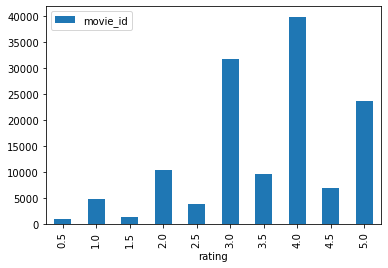

In [41]:
movielens.groupby('rating').agg({'movie_id': len}).plot.bar()

# 데이터 분할

In [ ]:
# 학습용과 테스트용으로 데이터를 분할한다

# 먼저, 각 사용자가 평가한 영화의 순서를 계산한다
# 직전에 부여한 영화부터 순번을 부여한다(1부터 시작)

movielens['timestamp_rank'] = movielens.groupby(
    'user_id')['timestamp'].rank(ascending=False, method='first')

In [47]:
movielens.groupby(
    'user_id')['timestamp'].rank(ascending=False, method='first')

0            1.0
1          408.0
2           84.0
3         1104.0
4          320.0
           ...  
132825      76.0
132826     128.0
132827     102.0
132828     120.0
132829      47.0
Name: timestamp, Length: 132830, dtype: float64

In [50]:
movielens.groupby(
    'user_id')['timestamp'].rank(ascending=True, method='first')

0          22.0
1         271.0
2         163.0
3         231.0
4         923.0
          ...  
132825    166.0
132826    114.0
132827    140.0
132828    122.0
132829    203.0
Name: timestamp, Length: 132830, dtype: float64

In [52]:
movielens['timestamp_rank'] <= 5

0          True
1         False
2         False
3         False
4         False
          ...  
132825    False
132826    False
132827    False
132828    False
132829    False
Name: timestamp_rank, Length: 132830, dtype: bool

In [43]:
# 각 사용자의  가장 최근 5건 이외는 학습용으로 한다
movielens_train = movielens[movielens['timestamp_rank'] > 5]

# 각 사용자의  가장 최근 직전 5건의 영화를 평가용
movielens_test = movielens[movielens['timestamp_rank']<= 5]

In [45]:
movielens_train

,user_id,movie_id,rating,timestamp,title,genre,tag,timestamp_rank
1,139,122,3.0,974302621,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem...",408.0
2,149,122,2.5,1112342322,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem...",84.0
3,182,122,3.0,943458784,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem...",1104.0
4,215,122,4.5,1102493547,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem...",320.0
6,281,122,3.0,844437024,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem...",42.0
...,...,...,...,...,...,...,...,...
132825,1045,57949,0.5,1215617256,"Welcome Home, Roscoe Jenkins (2008)",[Comedy],NaN,76.0
132826,1045,58291,0.5,1215616991,College Road Trip (2008),[Comedy],"[road trip, movie to see]",128.0
132827,1045,59306,3.0,1215617137,Prom Night (2008),"[Horror, Mystery, Thriller]",[remake],102.0
132828,1045,60286,3.0,1215617037,Finding Amanda (2008),"[Comedy, Drama]",NaN,120.0


In [63]:
movielens_test.sort_values(by=['user_id', 'timestamp_rank'])

,user_id,movie_id,rating,timestamp,title,genre,tag,timestamp_rank
0,1,122,5.0,838985046,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem...",1.0
4690,1,616,5.0,838984941,"Aristocats, The (1970)","[Animation, Children]","[disney, disney, disney animated feature, fran...",2.0
1762,1,362,5.0,838984885,"Jungle Book, The (1994)","[Adventure, Children, Romance]","[5, animated classic, bad remake, adapted from...",3.0
2657,1,466,5.0,838984679,Hot Shots! Part Deux (1993),"[Action, Comedy, War]","[charlie sheen, comedy, parody, zaz, charlie s...",4.0
3218,1,520,5.0,838984679,Robin Hood: Men in Tights (1993),[Comedy],"[parody, can't remember, very funny!, mel broo...",5.0
...,...,...,...,...,...,...,...,...
84072,1053,1242,5.0,1134008464,Glory (1989),"[Action, Drama, War]","[action, drama, war, c, historical lackluster,...",1.0
97783,1053,2501,5.0,1134008462,October Sky (1999),[Drama],"[liz should see, space program, true story, ae...",2.0
26369,1053,457,4.5,1134008458,"Fugitive, The (1993)",[Thriller],"[tommy lee jones, chase, tv series, excellent ...",3.0
29096,1053,2028,5.0,1134008444,Saving Private Ryan (1998),"[Action, Drama, War]","[world war ii, speilberg, steven spielberg, gf...",4.0
